# Sentiment Analysis with LSTMs

Dans ce notebook nous allons discuter 3 conceptes principaux afin de simplifier notre notebook. 

- Word vectors
- Recurrent neural networks
- Long short-term memory units (LSTMs). 

Après avoir une compréhension bien claire au differente théorie nous allons les introduire avec du code brute


# Word Vectors

Pour avoir une idée comment on peut appliquer le Deep Learning, pense au différente format des données qu'on peut utiliser afain de satisfaire les différents algorithmes. Convolutionnal network utilise des matrice de pixel sous forme numérique, régression linéaire utilise des données quantitative, et reinforcement learning utilise des signaux. le thème commun c'est que tout ces valeur doivent être des valeurs scalaires, ou des matrices de valeurs scalaire. Quand on pense a l'NLP ce genre de données doit être aussi scalaires.
 
![caption](Images/SentimentAnalysis.png)

Ce genre de donnée peut être problèmatique. On ne peut jamais faire des produit scalaire et des retropropagation sur des chaines de caractères . Alors pour faciliter et rendre possible les différente opération sur ces chaine de caractère on a pensé à convertir chaque mot dans les phrase comme étant un vecteur. 

![caption](Images/SentimentAnalysis2.png)

On peux penser par exemple que l'input de notre text est une matrice de 16 dimensions. 

Nous voulons que ces vecteurs soient créés de manière à représenter le mot et son contexte, sa signification et sa sémantique. Par exemple, nous préférerions que les vecteurs des mots «aimer» et «adorer» résident dans la même zone de l’espace vectoriel, car ils ont tous deux une définition similaire et sont tous deux utilisés dans des contextes similaires. La représentation vectorielle d'un mot est également appelée word embedding.

![caption](Images/SentimentAnalysis8.png)

# Word2Vec

Nous voulons que ces vecteurs soient créés de telle manière qu'ils représentent en quelque sorte le mot et son contexte, son sens et sa sémantique. Par exemple, nous aimerions que les vecteurs pour les mots «aimer» et «adorer» résident dans la même zone dans l'espace vectoriel, car ils ont tous les deux des définitions similaires et sont tous deux utilisés dans des contextes similaires. La représentation vectorielle d'un mot est également connue sous le nom d'incorporation de mots.

![caption](Images/SentimentAnalysis9.png)

Du contexte des phrases, nous pouvons voir que les deux mots sont généralement utilisés dans des phrases avec des connotations positives et précèdent généralement les noms ou les expressions nominales. C'est une indication que les deux mots ont quelque chose en commun et peuvent éventuellement être synonymes. Le contexte est également très important lorsque l'on considère la structure grammaticale dans les phrases. La plupart des phrases suivront les paradigmes traditionnels selon lesquels les verbes suivent les noms, les adjectifs précèdent les noms, et ainsi de suite. Pour cette raison, le modèle est plus susceptible de positionner les noms dans la même zone générale que les autres noms. Le modèle intègre un grand ensemble de phrases (Wikipédia en anglais par exemple) et génère des vecteurs pour chaque mot unique du corpus. La sortie d'un modèle Word2Vec s'appelle une matrice d'inclusion.

![caption](Images/SentimentAnalysis3.png)

Cette matrice d'inclusion contiendra des vecteurs pour chaque mot distinct du corpus d'apprentissage. Traditionnellement, les matrices d'inclusion peuvent contenir plus de 3 millions de vecteurs de mots.

Le modèle Word2Vec est entraîné en prenant chaque phrase dans l'ensemble de données, en glissant une fenêtre de taille fixe dessus, et en essayant de prédire le mot central de la fenêtre, étant donné les autres mots. En utilisant une fonction de perte et une procédure d'optimisation, le modèle génère des vecteurs pour chaque mot unique. Les détails de cette procédure de formation peuvent être un peu compliqués, donc nous allons passer à côté des détails pour l'instant, mais la principale conclusion ici est que les entrées dans toute approche Deep Learning d'une tâche NLP auront probablement des vecteurs de mots en entrée.


# Recurrent Neural Networks (RNNs)

Maintenant que nous avons nos vecteurs de mot en entrée, regardons l'architecture de réseau que nous allons construire. L'aspect unique des données NLP est qu'il y a un aspect temporel. Chaque mot d'une phrase dépend grandement de ce qui précède et vient après. Afin de rendre compte de cette dépendance, nous utilisons un réseau de neurones récurrent.

La structure du réseau neuronal récurrent est un peu différente de la NN feedforward traditionnelle que vous pourriez être accosté à voir. Le réseau feedforward se compose de noeuds d'entrée, d'unités cachées et de noeuds de sortie.

![caption](Images/SentimentAnalysis17.png)

La principale différence entre les réseaux de neurones feedforward et récurrents est l'aspect temporel de ces derniers. Dans les RNN, chaque mot d'une séquence d'entrée sera associé à un pas de temps spécifique. En effet, le nombre de pas de temps sera égal à la longueur de séquence maximale.

![caption](Images/SentimentAnalysis18.png)

Associé à chaque pas de temps est également un nouveau composant appelé un vecteur hidden state h <sub> t </sub>. D'un niveau élevé, ce vecteur cherche à encapsuler et résumer toutes les informations qui ont été vues dans les étapes de temps précédentes. Tout comme x <sub> t </sub> est un vecteur qui encapsule toutes les informations d'un mot spécifique, h <sub> t </sub> est un vecteur qui résume les informations des étapes précédentes.

The hidden state est une fonction à la fois du vecteur de mot courant et du vecteur d'état caché au pas de temps précédent. Le sigma indique que la somme des deux termes passera par une fonction d'activation (normalement un sigmoïde ou un tanh).

![caption](Images/SentimentAnalysis15.png)

Les 2 termes W dans la formulation ci-dessus représentent des matrices de poids. Si vous regardez de près les superscripts, vous verrez qu'il y a une matrice de poids W <sup> X </sup> que nous allons multiplier avec notre entrée, et il y a une matrice de poids récurrente W <sup> H </sup> qui est multiplié avec le vecteur d'hidden state de pas de temps précédent. W <sup> H </sup> est une matrice qui reste la même pour tous les pas de temps, et la matrice de poids W <sup> X </sup> est différente pour chaque entrée. 

La magnitude de ces matrices de poids affecte la quantité que le vecteur d'état caché est affecté par le vecteur courant ou l'état caché précédent. Pour un exercice, jetez un oeil à la formule ci-dessus, et considérez comment h <sub> t </sub> changerait si W <sup> X </sup> ou W <sup> H </sup> avaient de grandes ou petites valeurs.

Regardons un exemple rapide. Lorsque la magnitude de W <sup> H </sup> est grande et que la magnitude de W <sup> X </sup> est petite, on sait que h <sub> t </sub> est largement affecté par h <sub > t-1 </sub> et non affecté par x <sub> t </sub>. En d'autres termes, le vecteur d'état caché actuel voit que le mot courant est largement sans conséquence sur le résumé global de la phrase, et il aura donc essentiellement la même valeur que le vecteur au pas de temps précédent.

Les matrices de poids sont mises à jour grâce à un processus d'optimisation appelé rétropropagation .

Le hidden state vector au dernier moment, le pas est introduit dans un classificateur softmax binaire où il est multiplié par une autre matrice de pondération et soumis à une fonction softmax qui produit des valeurs entre 0 et 1, ce qui nous donne les probabilités de sentiment positif et négatif.

![caption](Images/SentimentAnalysis16.png)

# Long Short Term Memory Units (LSTMs) 

Long Short Term Memory Units est un module que vous pouvez placer dans des structures de réseaux de neurone reucrrent. À un niveau élevé, ils s'assurent que le vecteur de hidden state h est capable d'encapsuler des informations sur les dépendances à long terme dans le texte. Comme nous l'avons vu dans la section précédente, la formulation pour h dans les RNN traditionnels est relativement simple. Cette approche ne sera pas en mesure de relier efficacement des informations séparées par plus de deux pas de temps. Nous pouvons illustrer cette idée de gestion des dépendances à long terme par un exemple dans le domaine de la réponse aux questions. La fonction des modèles de réponse aux questions est de prendre un passage de texte et de répondre à une question sur son contenu. Regardons l'exemple suivant.

![caption](Images/SentimentAnalysis4.png)

Ici, nous voyons que la phrase du milieu n'a eu aucun impact sur la question qui a été posée. Cependant, il existe un lien fort entre les première et troisième phrases. Avec un RNN classique, le vecteur hidden state à la fin du réseau pourrait avoir stocké plus d'informations sur la phrase dog que sur la première phrase sur le nombre. Fondamentalement, l'ajout d'unités LSTM permet de déterminer les informations correctes et utiles qui doivent être stockées dans le vecteur d'état caché.

En regardant les unités LSTM d'un point de vue plus technique, les unités prennent le vecteur de mot courant x <sub> t </sub> et émettent le vecteur d'état caché h <sub> t </sub>. Dans ces unités, la formulation de h <sub> t </sub> ser un peu plus complexe que celle d'un RNN typique. Le calcul est décomposé en 4 composants, une porte d'entrée, une porte d'oubli (forget), une porte de sortie et un nouveau conteneur de mémoire. 

![caption](Images/SentimentAnalysis10.png)

Chaque porte prendra x <sub> t </sub> et h <sub> t-1 </sub> (non montré dans l'image) comme entrées et effectuera un calcul sur celles-ci pour obtenir des états intermédiaires. Chaque état intermédiaire est alimenté dans différents pipelines et finalement l'information est agrégée pour former h <sub> t </sub>. Par souci de simplicité, nous n'entrerons pas dans les formulations spécifiques de chaque portail, mais il convient de noter que chacune de ces portes peut être considérée comme différents modules au sein du LSTM ayant chacun des fonctions différentes. La porte d'entrée détermine combien d'accentuation mettre sur chacune des entrées, la porte d'oubli détermine les informations que nous allons jeter, et la porte de sortie détermine le h final <sub> t </sub> basé sur les états intermédiaires. Pour plus d'informations sur la compréhension des fonctions des différentes portes et les équations complètes, consultez Christopher Olah [blog post](http://colah.github.io/posts/2015-08-Understanding-LSTMs/).

En revenant sur le premier exemple avec la question "Quelle est la somme des deux nombres?", Le modèle devrait être formé sur des types similaires de questions et de réponses. Les unités LSTM seraient alors capables de réaliser que toute phrase sans nombre n'aura probablement pas d'impact sur la réponse à la question, et donc l'unité pourra utiliser sa porte d'oubli pour jeter les informations inutiles sur le chien, et plutôt Conservez les informations concernant les numéros. 

# Framing Sentiment Analysis as a Deep Learning Problem

Comme mentionné précédemment, la tâche de l'analyse des sentiments consiste à saisir une séquence d'entrée de mots et à déterminer si le sentiment est positif, négatif ou neutre. Nous pouvons séparer cette tâche spécifique (et la plupart des autres tâches PNL) en 5 composants différents.

    1) Formation d'un modèle de génération de vecteurs de mots (tel que Word2Vec) ou chargement de vecteurs de mots pré-assemblés
    2) Création d'une matrice d'ID pour notre ensemble d'entraînement
    3) Création de graphe RNN (avec unités LSTM)
    4) Training
    5) Test

# Loading Data 

Premièrement, nous voulons créer nos vecteurs de mots. Pour simplifier, nous allons utiliser un modèle pré-entraîné.

En tant que l'un des plus grandes entreprise de machine learning, Google a pu former un modèle Word2Vec sur un ensemble de données Google News qui contenait plus de 100 milliards de mots différents! De ce modèle, Google [a pu entrain 3 million vecteur de mots](https://code.google.com/archive/p/word2vec/#Pre-trained_word_and_phrase_vectors), chacun de dimentionnalité de 300.

Dans un scénario idéal, nous utiliserions ces vecteurs, mais comme la matrice des vecteurs de mots est assez grande (3,6 Go!), Nous utiliserons une matrice avec moin de taille qui est entraînée en utilisant[GloVe](http://nlp.stanford.edu/projects/glove/), un modèle de génération de vecteur de mot similaire. La matrice contiendra 400 000 vecteurs de mots, chacun ayant une dimension de 50.

Nous allons importer deux structures de données différentes, l'une sera une liste Python avec les 400 000 mots, et l'autre sera une matrice d'inclusion 400 000 x 50 qui contiendra toutes les valeurs de vecteur de mots.

In [1]:
import numpy as np
wordsList = np.load('wordsList.npy')
print('Loaded the word list!')
wordsList = wordsList.tolist() #Originally loaded as numpy array
wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
wordVectors = np.load('wordVectors.npy')
print ('Loaded the word vectors!')

Loaded the word list!
Loaded the word vectors!


Juste pour s'assurer que tout a été correctement chargé, nous pouvons regarder les dimensions de la liste de vocabulaire et de la matrice d'intégration.

In [2]:
print(len(wordsList))
print(wordVectors.shape)

400000
(400000, 50)


Nous pouvons également chercher dans notre liste de mots un mot comme "baseball", puis accéder à son vecteur correspondant à travers la matrice d'intégration.

In [3]:
baseballIndex = wordsList.index('baseball')
wordVectors[baseballIndex]

array([-1.93270004,  1.04209995, -0.78514999,  0.91033   ,  0.22711   ,
       -0.62158   , -1.64929998,  0.07686   , -0.58679998,  0.058831  ,
        0.35628   ,  0.68915999, -0.50598001,  0.70472997,  1.26639998,
       -0.40031001, -0.020687  ,  0.80862999, -0.90565997, -0.074054  ,
       -0.87674999, -0.62910002, -0.12684999,  0.11524   , -0.55685002,
       -1.68260002, -0.26291001,  0.22632   ,  0.713     , -1.08280003,
        2.12310004,  0.49869001,  0.066711  , -0.48225999, -0.17896999,
        0.47699001,  0.16384   ,  0.16537   , -0.11506   , -0.15962   ,
       -0.94926   , -0.42833   , -0.59456998,  1.35660005, -0.27506   ,
        0.19918001, -0.36008   ,  0.55667001, -0.70314997,  0.17157   ], dtype=float32)

Maintenant que nous avons nos vecteurs, notre première étape consiste à prendre une phrase d'entrée puis à construire la représentation de son vecteur. Disons que nous avons la phrase d'entrée "Je pensais que le film était incroyable et inspirant". Pour obtenir les vecteurs de mots, nous pouvons utiliser la fonction de recherche d'intégration de Tensorflow. Cette fonction prend deux arguments, un pour la matrice d'intégration (la matrice wordVectors dans notre cas) et un pour les identifiants de chacun des mots. Le vecteur ids peut être considéré comme la représentation entière de l'ensemble d'apprentissage. C'est fondamentalement juste l'index de ligne de chacun des mots. Regardons un exemple rapide pour rendre cela concret.

In [4]:
import tensorflow as tf
maxSeqLength = 10 #Maximum length of sentence
numDimensions = 300 #Dimensions for each word vector
firstSentence = np.zeros((maxSeqLength), dtype='int32')
firstSentence[0] = wordsList.index("i")
firstSentence[1] = wordsList.index("thought")
firstSentence[2] = wordsList.index("the")
firstSentence[3] = wordsList.index("movie")
firstSentence[4] = wordsList.index("was")
firstSentence[5] = wordsList.index("incredible")
firstSentence[6] = wordsList.index("and")
firstSentence[7] = wordsList.index("inspiring")
#firstSentence[8] and firstSentence[9] are going to be 0
print(firstSentence.shape)
print(firstSentence) #Shows the row index for each word

(10,)
[    41    804 201534   1005     15   7446      5  13767      0      0]


le pipeline de données peut être représenté ainsi.

![caption](Images/SentimentAnalysis5.png)

La sortie 10 x 50 doit contenir les vecteurs de mot 50 dimensions pour chacun des 10 mots de la séquence.

In [14]:
with tf.Session() as sess:
    print(tf.nn.embedding_lookup(wordVectors,firstSentence).eval().shape)

(10, 50)


Avant de créer la matrice d'identifiants pour l'ensemble de l'ensemble de formation, prenons d'abord un certain temps pour visualiser le type de données que nous avons. Cela nous aidera à déterminer la meilleure valeur pour définir notre longueur de séquence maximale. Dans l'exemple précédent, nous avons utilisé une longueur maximale de 10, mais cette valeur dépend largement des entrées que vous avez.

Le dataset que nous allons utiliser est le jeu de données de review de Amazon food. Cet ensemble compte 35173 critiques de films, avec  critiques positives et 25 087 critiques positives. Chacune des critiques est stockée dans un fichier txt que nous devons analyser. Les commentaires négatives sont stockés dans un répertoire et les avis négatifs sont stockés dans un autre. Le morceau de code suivant déterminera le nombre total et moyen de mots dans chaque révision.

In [6]:
from os import listdir
from os.path import isfile, join
positiveFiles = ['positiveReviews/' + f for f in listdir('positiveReviews/') if isfile(join('positiveReviews/', f))]
negativeFiles = ['negativeReviews/' + f for f in listdir('negativeReviews/') if isfile(join('negativeReviews/', f))]
numWords = []
for pf in positiveFiles:
    with open(pf, "r", encoding='utf-8') as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)       
print('Positive files finished')

for nf in negativeFiles:
    with open(nf, "r", encoding='utf-8') as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)  
print('Negative files finished')

numFiles = len(numWords)
print('The total number of files is', numFiles)
print('The total number of words in the files is', sum(numWords))
print('The average number of words in the files is', sum(numWords)/len(numWords))

Positive files finished
Negative files finished
The total number of files is 35173
The total number of words in the files is 2713530
The average number of words in the files is 77.14809655133199


Nous pouvons également utiliser la bibliothèque Matplot pour visualiser ces données dans un format d'histogramme.

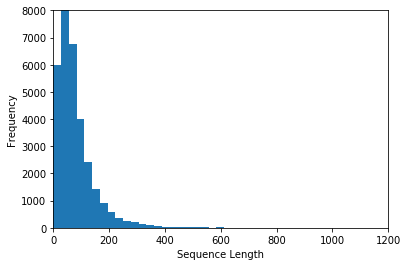

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(numWords, 50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.axis([0, 1200, 0, 8000])
plt.show()

A partir de l'histogramme ainsi que du nombre moyen de mots par fichier, nous pouvons affirmer que la plupart des révisions tomberont sous 80 mots, on choisit alors la longueur de message de  150.

In [8]:
maxSeqLength = 150

Voyons comment nous pouvons prendre un seul fichier et le transformer en notre matrice d'identifiants. C'est ce que l'un des commentaires ressemble au format de fichier texte.

In [9]:
fname = positiveFiles[3] #Can use any valid index (not just 3)
with open(fname) as f:
    for lines in f:
        print(lines)
        exit

We started using ghee in place of oils to help our daughter with severe autism.  She appears to be in better health and mood since this change.  We have tried four different varieties of ghee, but this is the best tasting and fits into more recipes because of the mild taste. There is a big price difference, but this  and is worth the extra money.


Maintenant, convertissons en une matrice d'identifiants

In [10]:
# Removes punctuation, parentheses, question marks, etc., and leaves only alphanumeric characters
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

In [11]:
firstFile = np.zeros((maxSeqLength), dtype='int32')
with open(fname) as f:
    indexCounter = 0
    line=f.readline()
    cleanedLine = cleanSentences(line)
    split = cleanedLine.split()
    for word in split:
        try:
            firstFile[indexCounter] = wordsList.index(word)
        except ValueError:
            firstFile[indexCounter] = 399999 #Vector for unknown words
        indexCounter = indexCounter + 1
firstFile

array([    53,    551,    622,  68774,      6,    241,      3,  16237,
            4,    275,    162,   1131,     17,   2546,  17179,     67,
         1658,      4,     30,      6,    439,    360,      5,   5030,
          108,     37,    511,     53,     33,    977,    133,    494,
         8576,      3,  68774,     34,     37,     14, 201534,    254,
        16701,      5,  10094,     75,     56,   8628,    113,      3,
       201534,   6715,   4374,     63,     14,      7,    365,    626,
         2333,     34,     37,      5,     14,   1089, 201534,   2004,
          308,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

Maintenant, faisons la même chose pour chacun de nos 35173 avis. Nous chargerons dans l'ensemble de formation de film et l'integerize pour obtenir une matrice 35173 x 150. C'était un processus coûteux en calcul, donc au lieu de vous faire exécuter toute la pièce, nous allons charger dans une matrice d'ID pré-calculée.

In [ ]:
# ids = np.zeros((numFiles, maxSeqLength), dtype='int32')
# fileCounter = 0
# for pf in positiveFiles:
#    with open(pf, "r") as f:
#        indexCounter = 0
#        line=f.readline()
#        cleanedLine = cleanSentences(line)
#        split = cleanedLine.split()
#        for word in split:
#            try:
#                ids[fileCounter][indexCounter] = wordsList.index(word)
#            except ValueError:
#                ids[fileCounter][indexCounter] = 399999 #Vector for unkown words
#            indexCounter = indexCounter + 1
#            if indexCounter >= maxSeqLength:
#                break
#        fileCounter = fileCounter + 1 
#
# for nf in negativeFiles:
#    with open(nf, "r") as f:
#        indexCounter = 0
#        line=f.readline()
#        cleanedLine = cleanSentences(line)
#        split = cleanedLine.split()
#        for word in split:
#            try:
#                ids[fileCounter][indexCounter] = wordsList.index(word)
#            except ValueError:
#                ids[fileCounter][indexCounter] = 399999 #Vector for unkown words
#            indexCounter = indexCounter + 1
#            if indexCounter >= maxSeqLength:
#                break
#        fileCounter = fileCounter + 1 
 #Pass into embedding function and see if it evaluates. 

# np.save('idsMatrix', ids)

In [12]:
ids = np.load('idsMatrix.npy')

# Helper Functions

Vous trouverez ci-dessous quelques fonctions auxiliaires utiles lors de la formation ultérieure du réseau.

In [13]:
from random import randint

def getTrainBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        if (i % 2 == 0): 
            num = randint(1,25087)
            labels.append([1,0])
        else:
            num = randint(28087,35171)
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        num = randint(25087,28087)
        if (num <= 27087):
            labels.append([1,0])
        else:
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

# RNN Model

Maintenant, nous sommes prêts à commencer à créer notre graph Tensorflow. Nous devons d'abord définir certains hyperparamètres, tels que la taille du lot, le nombre d'unités LSTM, le nombre de classes de sortie et le nombre d'itérations d'apprentissage.

In [22]:
batchSize = 24
lstmUnits = 64
numClasses = 2
iterations = 100000

Comme avec la plupart des graph Tensorflow, nous allons maintenant spécifier deux espaces réservés, un pour les entrées dans le réseau et un pour les étiquettes. La partie la plus importante de la définition de ces espaces réservés est de comprendre chacune de leurs dimensions.

L'espace réservé des étiquettes représente un ensemble de valeurs, chacune [1, 0] ou [0, 1], selon que chaque exemple d'apprentissage est positif ou négatif. Chaque ligne de l'espace est représenté a une etiquette(label)

![caption](Images/SentimentAnalysis12.png)

In [23]:
import tensorflow as tf
tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

Une fois que nous avons notre espace réservé pour les données d'entrée, nous allons appeler la fonction tf.nn.lookup () afin d'obtenir nos vecteurs de mots. L'appel à cette fonction renvoie un tensor 3D de taille de lot de dimensionnalité par longueur de séquence maximale par dimensions de vecteur de mot. Afin de visualiser ce tenseur 3D, vous pouvez simplement considérer chaque point de données dans le tensor d'entrée entier comme le vecteur dimensionnel correspondant auquel il fait référence.

![caption](Images/SentimentAnalysis13.png)

In [24]:
data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)

Maintenant que nous avons les données dans le format que nous voulons, regardons comment nous pouvons nourrir cette entrée dans un réseau LSTM. Nous allons appeler la fonction tf.nn.rnn_cell.BasicLSTMCell. Cette fonction prend un nombre entier pour le nombre d'unités LSTM que nous voulons. C'est l'un des hyperparamètres qui prendra un certain réglage pour déterminer la valeur optimale. Nous allons ensuite envelopper cette cellule LSTM dans un dropout layer pour éviter que le réseau ne fait pas un sur-apprentissage.

Enfin, nous allons alimenter la cellule LSTM et le tensor 3D complet des données d'entrée dans une fonction appelée tf.nn.dynamic_rnn. Cette fonction est chargée de dérouler tout le réseau et de créer un chemin pour que les données circulent à travers le graphe RNN.

In [25]:
lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

En remarque, un autre choix d'architecture de réseau plus avancé consiste à empiler plusieurs cellules LSTM les unes sur les autres. C'est là que le vecteur d'état caché final du premier LSTM se nourrit dans le second. Empiler ces cellules est une excellente façon d'aider le modèle à conserver plus d'informations sur la dépendance à long terme, mais introduit également plus de paramètres dans le modèle, augmentant ainsi le temps d'entraînement, le besoin d'exemples d'entraînement supplémentaires et les risques d'overfitting. Pour plus d'informations sur la façon dont vous pouvez ajouter des LSTM empilés à votre modèle, consultez l'excellente [documentation](https://www.tensorflow.org/tutorials/recurrent#stacking_multiple_lstms) du Tensorflow.

La première sortie de la fonction RNN dynamique peut être considérée comme le dernier vecteur de hidden state. Ce vecteur sera remodelé puis multiplié par une matrice de poids final et un terme de biais pour obtenir les valeurs de sortie finales.

In [26]:
weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

Ensuite, nous définirons des métriques de prédiction et de précision correctes pour suivre l'évolution du réseau. La formulation de prédiction correcte fonctionne en examinant l'index de la valeur maximale des deux valeurs de sortie, puis en vérifiant si elle correspond aux étiquettes d'apprentissage.

In [27]:
correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

Nous allons définir une standard de cross entropy loss avec une couche softmax placée au-dessus des valeurs de prédiction finale. Pour l'optimiseur, nous allons utiliser Adam et le taux d'apprentissage par défaut de 0,001.

In [28]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

Si vous souhaitez utiliser Tensorboard pour visualiser les valeurs de perte et de précision, vous pouvez également exécuter et modifier le code suivant.

In [29]:
import datetime

tf.summary.scalar('Loss', loss)
tf.summary.scalar('Accuracy', accuracy)
merged = tf.summary.merge_all()
logdir = "tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
writer = tf.summary.FileWriter(logdir, sess.graph)

# Hyperparameter Tuning

Choisir les bonnes valeurs pour vos hyperparamètres est une partie cruciale de la formation efficace des réseaux de neurone profonds. Vous constaterez que vos courbes de perte d'entraînement peuvent varier selon votre choix d'optimiseur (Adam, Adadelta, SGD, etc.), le taux d'apprentissage et l'architecture réseau. Avec les RNN et les LSTM en particulier, d'autres facteurs importants incluent le nombre d'unités LSTM et la taille des vecteurs de mots.

* Learning Rate: RNN sont tristement célèbres pour être diffultes à former en raison du grand nombre de pas de temps qu'ils ont. Le taux d'apprentissage devient extrêmement important car nous ne voulons pas que nos valeurs de poids fluctuent énormément en raison d'un taux d'apprentissage élevé, et nous ne voulons pas d'un processus d'entraînement lent en raison d'un faible taux d'apprentissage. La valeur par défaut de 0,001 est un bon point de départ. Vous devriez augmenter cette valeur si la perte d'entraînement change très lentement, et diminuer si la perte est instable.

* Optimizer: Il n'y a pas de choix consensuel parmi les chercheurs, mais Adam a été très populaire en raison de sa propriété de taux d'apprentissage adaptatif (retenez bien optimal learning rates diffère avec le choix de l'optimizer).

* Number of LSTM units: Cette valeur dépend en grande partie de la longueur moyenne de vos textes d'entrée. Alors qu'un plus grand nombre d'unités fournit plus d'expressivité pour le modèle et permet au modèle de stocker plus d'informations pour des textes plus longs, le réseau prendra plus de temps à s'entraîner et sera coûteux en termes de calcul.

* Word Vector Size: Les dimensions pour les vecteurs de mots vont généralement de 50 à 300. Une taille plus grande signifie que le vecteur est capable d'encapsuler plus d'informations sur le mot, mais vous devriez également vous attendre à un modèle plus coûteux en calcul.

# Training

L'idée de base de la boucle d'apprentissage est que nous définissons d'abord une session Tensorflow. Ensuite, nous chargeons un lot de critiques et leurs étiquettes associées. Ensuite, nous appelons la fonction `run` de la session. Cette fonction a deux arguments. Le premier s'appelle l'argument "fetchs". Il définit la valeur que nous sommes intéressés par l'informatique. Nous voulons que notre optimiseur soit calculé car c'est le composant qui minimise notre fonction de perte. Le deuxième argument est où nous entrons notre `feed_dict`. Cette structure de données est l'endroit où nous fournissons des intrants à tous nos espaces réservés. Nous devons nourrir notre batsh de review et notre batsh d'étiquettes (label). Cette boucle est ensuite répétée pour un nombre déterminé d'itérations d'apprentissage.

Au lieu de former le réseau dans ce cahier (ce qui prendra au moins quelques heures), nous chargerons dans un modèle pré-entraîné. [TensorBoard](https://www.tensorflow.org/get_started/summaries_and_tensorboard). 

In [30]:
 sess = tf.InteractiveSession()
 saver = tf.train.Saver()
 sess.run(tf.global_variables_initializer())

 for i in range(iterations):
    #Next Batch of reviews
    nextBatch, nextBatchLabels = getTrainBatch();
    sess.run(optimizer, {input_data: nextBatch, labels: nextBatchLabels})
   
    #Write summary to Tensorboard
    if (i % 50 == 0):
        summary = sess.run(merged, {input_data: nextBatch, labels: nextBatchLabels})
        writer.add_summary(summary, i)

#    #Save the network every 10,000 training iterations
    if (i % 10000 == 0 and i != 0):
        save_path = saver.save(sess, "models/pretrained_lstm_1.ckpt", global_step=i)
        print("saved to %s" % save_path)
 writer.close()

saved to models/pretrained_lstm_1.ckpt-10000
saved to models/pretrained_lstm_1.ckpt-20000
saved to models/pretrained_lstm_1.ckpt-30000
saved to models/pretrained_lstm_1.ckpt-40000
saved to models/pretrained_lstm_1.ckpt-50000
saved to models/pretrained_lstm_1.ckpt-60000
saved to models/pretrained_lstm_1.ckpt-70000
saved to models/pretrained_lstm_1.ckpt-80000
saved to models/pretrained_lstm_1.ckpt-90000


# Loading a Pretrained Model

La precision(accuracy) et Loss sont représentés dans les figures suivantes

![caption](Images/SentimentAnalysis6.png)
![caption](Images/SentimentAnalysis7.png)

En regardant les courbes d'entraînement ci-dessus, il semble que la formation du modèle se passe bien. La perte diminue régulièrement et la précision approche de 100%. Toutefois, lors de l'analyse des courbes d'entraînement, nous devrions également accorder une attention particulière à la possibilité que notre modèle overfit l'ensemble de données d'apprentissage. Le surapprentissage est un phénomène courant dans l'apprentissage automatique où un modèle devient si adapté aux données d'apprentissage qu'il perd la possibilité de généraliser à l'ensemble de test. Cela signifie que la formation d'un réseau jusqu'à ce que vous atteignez 0 perte d'entraînement ne soit pas la meilleure façon d'obtenir un modèle précis qui fonctionne bien sur des données qu'il n'a jamais vues auparavant. L'arrêt précoce est une technique intuitive couramment utilisée avec les réseaux LSTM pour lutter contre ce problème. L'idée de base est que nous formons le modèle sur notre ensemble d'entraînement, tout en mesurant de temps en temps ses performances sur l'ensemble de test. Une fois que l'erreur de test cesse de diminuer régulièrement et commence à augmenter à la place, vous saurez arrêter l'entraînement, car c'est un signe que le réseau a commencé à être overfit.

Le chargement d'un modèle pré-entraîné implique la définition d'une autre session Tensorflow, la création d'un objet Saver, puis l'utilisation de cet objet pour appeler la fonction de restauration. Cette fonction prend en compte 2 arguments, un pour la session en cours, et un pour le nom du modèle sauvegardé.

In [ ]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('models'))

Ensuite, nous allons charger quelques critiques de films de notre ensemble de test. Rappelez-vous, ce sont des critiques que le modèle n'a pas été formé et n'a jamais vu auparavant. La précision pour chaque batch de test peut être vu lorsque vous exécutez le code suivant.

In [34]:
iterations = 10
for i in range(iterations):
    nextBatch, nextBatchLabels = getTestBatch();
    print("Accuracy for this batch:", (sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels})) * 100)

Accuracy for this batch: 91.6666686535
Accuracy for this batch: 91.6666686535
Accuracy for this batch: 66.6666686535
Accuracy for this batch: 79.1666686535
Accuracy for this batch: 79.1666686535
Accuracy for this batch: 75.0
Accuracy for this batch: 75.0
Accuracy for this batch: 75.0
Accuracy for this batch: 87.5
Accuracy for this batch: 83.3333313465
